In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_excel("globalterrorismdb_0221dist.xlsx")

In [5]:
dataset.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
dataset.shape

(201183, 135)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 207.2+ MB


In [8]:
check_nulls = dataset.isnull().sum().sort_values(ascending=False)
check_nulls.head()

gsubname3           201160
weapsubtype4        201113
weapsubtype4_txt    201113
weaptype4           201110
weaptype4_txt       201110
dtype: int64

In [9]:
row_count = dataset.shape[0]
check_nulls_percentage = 100 * check_nulls / row_count
check_nulls_percentage.head()

gsubname3           99.988568
weapsubtype4        99.965206
weapsubtype4_txt    99.965206
weaptype4           99.963715
weaptype4_txt       99.963715
dtype: float64

In [10]:
bins = (-1, 0, 25, 50, 75, 100)
labels = ['0 %','1-25 %','25-50 %','50-75 %','75-100 %']

check_nulls_percentage_grouped = pd.cut(check_nulls_percentage, bins, labels=labels)
check_nulls_percentage_grouped.head()

gsubname3           75-100 %
weapsubtype4        75-100 %
weapsubtype4_txt    75-100 %
weaptype4           75-100 %
weaptype4_txt       75-100 %
dtype: category
Categories (5, object): ['0 %' < '1-25 %' < '25-50 %' < '50-75 %' < '75-100 %']

In [11]:
check_nulls_percentage_grouped_counts = check_nulls_percentage_grouped.value_counts()
check_nulls_percentage_grouped_counts.sort_index()

0 %         32
1-25 %      16
25-50 %     10
50-75 %      7
75-100 %    70
dtype: int64

C:\Users\okgkc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sütun Sayısı')

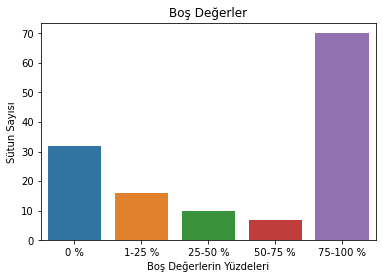

In [12]:
sns.barplot(check_nulls_percentage_grouped_counts.index, check_nulls_percentage_grouped_counts.values)
plt.title('Boş Değerler')
plt.xlabel('Boş Değerlerin Yüzdeleri')
plt.ylabel('Sütun Sayısı')

In [13]:
cols_float = dataset.select_dtypes(include=['float64']).columns
cols_float

Index(['latitude', 'longitude', 'specificity', 'alternative', 'attacktype2',
       'attacktype3', 'targsubtype1', 'natlty1', 'targtype2', 'targsubtype2',
       'natlty2', 'targtype3', 'targsubtype3', 'natlty3', 'guncertain1',
       'guncertain2', 'guncertain3', 'nperps', 'nperpcap', 'claimed',
       'claimmode', 'claim2', 'claimmode2', 'claim3', 'claimmode3',
       'compclaim', 'weapsubtype1', 'weaptype2', 'weapsubtype2', 'weaptype3',
       'weapsubtype3', 'weaptype4', 'weapsubtype4', 'nkill', 'nkillus',
       'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'propextent', 'propvalue',
       'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'ransom',
       'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus',
       'hostkidoutcome', 'nreleased'],
      dtype='object')

In [14]:
dataset[cols_float].head(3)

,latitude,longitude,specificity,alternative,attacktype2,attacktype3,targsubtype1,natlty1,targtype2,targsubtype2,...,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased
0,18.456792,-69.951164,1.0,NaN,NaN,NaN,68.0,58.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,19.371887,-99.086624,1.0,NaN,NaN,NaN,45.0,21.0,NaN,NaN,...,0.0,NaN,NaN,1.0,800000.0,NaN,NaN,NaN,NaN,NaN
2,15.478598,120.599741,4.0,NaN,NaN,NaN,54.0,217.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cols_int = dataset.select_dtypes(include=['int64']).columns
cols_int

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple',
       'success', 'suicide', 'attacktype1', 'targtype1', 'individual',
       'weaptype1', 'property', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [16]:
dataset[cols_int].head(3)

,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,...,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,2,0,1,1,...,0,1,14,0,13,0,0,0,0,0
1,197000000002,1970,0,0,0,130,1,0,1,1,...,0,6,7,0,13,0,0,1,1,1
2,197001000001,1970,1,0,0,160,5,0,1,1,...,0,1,10,0,13,0,-9,-9,1,1


In [23]:
cols_object = dataset.select_dtypes(include=['object']).columns
cols_object

Index(['approxdate', 'country_txt', 'region_txt', 'provstate', 'city',
       'location', 'summary', 'alternative_txt', 'attacktype1_txt',
       'attacktype2_txt', 'attacktype3_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'targtype2_txt',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2_txt', 'targtype3_txt',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3_txt', 'gname',
       'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive',
       'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt', 'weaptype1_txt',
       'weapsubtype1_txt', 'weaptype2_txt', 'weapsubtype2_txt',
       'weaptype3_txt', 'weapsubtype3_txt', 'weaptype4_txt',
       'weapsubtype4_txt', 'weapdetail', 'propextent_txt', 'propcomment',
       'divert', 'kidhijcountry', 'ransomnote', 'hostkidoutcome_txt',
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'related'],
      dtype='object')

In [24]:
dataset[cols_object].head(3)

,approxdate,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,attacktype2_txt,...,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource,related
0,NaN,Dominican Republic,Central America & Caribbean,National,Santo Domingo,NaN,NaN,NaN,Assassination,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,NaN
1,NaN,Mexico,North America,Federal,Mexico city,NaN,NaN,NaN,Hostage Taking (Kidnapping),NaN,...,NaN,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,NaN
2,NaN,Philippines,Southeast Asia,Tarlac,Unknown,NaN,NaN,NaN,Assassination,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,NaN


In [25]:
dataset.gname.isnull().sum()

0

In [37]:
grp_counts = dataset.gname.value_counts()
grp_counts.head(11)

Unknown                                             89231
Taliban                                             10094
Islamic State of Iraq and the Levant (ISIL)          6864
Shining Path (SL)                                    4563
Al-Shabaab                                           4126
Farabundo Marti National Liberation Front (FMLN)     3351
New People's Army (NPA)                              3249
Boko Haram                                           3018
Houthi extremists (Ansar Allah)                      2776
Irish Republican Army (IRA)                          2669
Kurdistan Workers' Party (PKK)                       2524
Name: gname, dtype: int64

In [26]:
plt.bar(grp_counts.index, grp_counts(50))

TypeError: 'Series' object is not callable

In [27]:
grp_counts_known = grp_counts.loc[grp_counts.index != 'Unknown'].sum()
grp_counts_known

111952

In [29]:
grp_counts_unknown = grp_counts[0]
grp_counts_unknown

89231

C:\Users\okgkc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\okgkc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Percentage of Attacks')

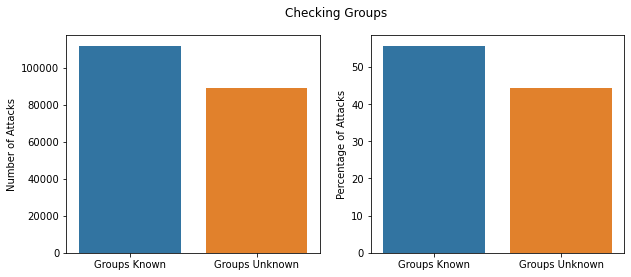

In [30]:
fig, (a0, a1) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Checking Groups')

sns.barplot(['Groups Known','Groups Unknown'],[grp_counts_known, grp_counts_unknown], ax=a0)
a0.set_ylabel('Number of Attacks')

sns.barplot(['Groups Known','Groups Unknown'],100 * np.array([grp_counts_known, grp_counts_unknown]) / row_count, ax=a1)
a1.set_ylabel('Percentage of Attacks')

In [31]:
grp_counts.shape

(3671,)

In [32]:
top15 = grp_counts[1:16]
top15

Taliban                                             10094
Islamic State of Iraq and the Levant (ISIL)          6864
Shining Path (SL)                                    4563
Al-Shabaab                                           4126
Farabundo Marti National Liberation Front (FMLN)     3351
New People's Army (NPA)                              3249
Boko Haram                                           3018
Houthi extremists (Ansar Allah)                      2776
Irish Republican Army (IRA)                          2669
Kurdistan Workers' Party (PKK)                       2524
Revolutionary Armed Forces of Colombia (FARC)        2490
Communist Party of India - Maoist (CPI-Maoist)       2037
Basque Fatherland and Freedom (ETA)                  2024
Maoists                                              1979
National Liberation Army of Colombia (ELN)           1760
Name: gname, dtype: int64

## feature selection

In [34]:
summary_gname = dataset.loc[:, ['summary','gname']]
summary_gname.head(3)

,summary,gname
0,NaN,MANO-D
1,NaN,23rd of September Communist League
2,NaN,Unknown


In [35]:
summary_gname.isnull().sum()

summary    66121
gname          0
dtype: int64

In [36]:
summary_gname.gname.value_counts().shape

(3671,)

In [37]:
summary_gname.dropna(inplace=True)
summary_gname.head(3)

,summary,gname
5,1/1/1970: Unknown African American assailants ...,Black Nationalists
7,1/2/1970: Unknown perpetrators detonated explo...,Unknown
8,"1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang


In [38]:
summary_gname.shape

(135062, 2)

In [39]:
(summary_gname.gname == 'Unknown').sum()

66108

In [40]:
(summary_gname.gname != 'Unknown').sum()

68954

In [41]:
unknown_grps = summary_gname.loc[summary_gname.gname == 'Unknown'].copy()
unknown_grps.head(3)

,summary,gname
7,1/2/1970: Unknown perpetrators detonated explo...,Unknown
40,1/31/1970: Unknown perpetrators bombed the Pol...,Unknown
43,2/2/1970: An incendiary device was discovered ...,Unknown


In [42]:
known_grps = summary_gname.loc[summary_gname.gname != 'Unknown'].copy()
known_grps.head(5)

,summary,gname
5,1/1/1970: Unknown African American assailants ...,Black Nationalists
8,"1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang
9,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang
11,1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants
13,1/9/1970: Unknown perpetrators set off a fireb...,Left-Wing Militants
